In [1]:
from shared import *
args = SimpleParser()
args.from_dict({'sample': 0})
args.process_args()

apx_args = SimpleParser()
apx_args.from_dict({'sample': 0.1})
apx_args.process_args()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
df_labels = pd.read_csv(args.label_src)
df_request = pd.read_csv(args.req_src)
ffilename = 'features_0'
df = pd.read_csv(os.path.join(args.feature_dir, f'{ffilename}.csv'))
apx_df = pd.read_csv(os.path.join(apx_args.feature_dir, f'{ffilename}.csv'))

In [3]:

df = df.merge(df_labels, on='trip_id').merge(df_request, on='trip_id')
apx_df = apx_df.merge(df_labels, on='trip_id').merge(df_request, on='trip_id')
assert df['trip_id'].equals(apx_df['trip_id'])
df.head()

,count_1h,avg_trip_duration_1h,avg_trip_distance_1h,avg_fare_amount_1h,avg_tip_amount_1h,avg_total_amount_1h,sum_trip_duration_1h,sum_trip_distance_1h,sum_fare_amount_1h,sum_tip_amount_1h,...,Unnamed: 0,passenger_count,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_ntaname,dropoff_ntaname,trip_distance
0,43.0,551.953488,2.093953,9.313953,1.092791,11.335581,23734.0,90.040000,400.500000,46.990000,...,517450,5,2015-08-02 11:17:35,-73.962822,40.766739,-73.980911,40.762421,Upper East Side-Carnegie Hill,Midtown-Midtown South,1.56
1,235.0,776.131915,2.084000,11.093617,1.131957,13.282766,182391.0,489.740000,2607.000000,266.010001,...,2351860,2,2015-08-07 09:34:09,-73.988136,40.748470,-73.974731,40.742023,Midtown-Midtown South,Murray Hill-Kips Bay,1.40
2,462.0,573.266234,2.894069,11.156926,1.622294,13.903268,264849.0,1337.060001,5154.500000,749.500002,...,781021,1,2015-08-03 07:30:35,-73.950058,40.771931,-73.953583,40.775494,Yorkville,Yorkville,0.92
3,2235.0,709.118568,1.645280,9.586935,1.353409,12.772694,1584880.0,3677.200000,21426.799999,3024.870009,...,3537019,1,2015-08-10 18:35:54,-73.984459,40.746353,-73.988838,40.754169,Midtown-Midtown South,Midtown-Midtown South,0.80
4,672.0,721.577381,2.496250,11.145536,1.699345,14.225655,484900.0,1677.479999,7489.799999,1141.960001,...,2234252,1,2015-08-06 23:28:38,-73.983330,40.730366,-73.987595,40.750015,East Village,Midtown-Midtown South,1.95


In [4]:
df.isna().sum()

count_1h                     0
avg_trip_duration_1h       222
avg_trip_distance_1h       222
avg_fare_amount_1h         222
avg_tip_amount_1h          222
avg_total_amount_1h        222
sum_trip_duration_1h         0
sum_trip_distance_1h         0
sum_fare_amount_1h           0
sum_tip_amount_1h            0
sum_total_amount_1h          0
std_trip_duration_1h       222
std_trip_distance_1h       222
std_fare_amount_1h         222
std_tip_amount_1h          222
std_total_amount_1h        222
var_trip_duration_1h       222
var_trip_distance_1h       222
var_fare_amount_1h         222
var_tip_amount_1h          222
var_total_amount_1h        222
min_trip_duration_1h         0
min_trip_distance_1h         0
min_fare_amount_1h           0
min_tip_amount_1h            0
min_total_amount_1h          0
max_trip_duration_1h         0
max_trip_distance_1h         0
max_fare_amount_1h           0
max_tip_amount_1h            0
max_total_amount_1h          0
median_trip_duration_1h    222
median_t

In [5]:
# assert df.isna().equals(apx_df.isna())

# if the row in df contains NaN, remove that row from both df and apx_df
isna = df.isna().any(axis=1)
df = df[~isna]
apx_df = apx_df[~isna]

# if the row in apx_df contains NaN value, set that NaN value to 0
apx_df = apx_df.fillna(0)

In [6]:
assert df.isna().sum().sum() == 0 and apx_df.isna().sum().sum() == 0 and df['trip_id'].equals(apx_df['trip_id'])

In [7]:
apx_df.describe()

,count_1h,avg_trip_duration_1h,avg_trip_distance_1h,avg_fare_amount_1h,avg_tip_amount_1h,avg_total_amount_1h,sum_trip_duration_1h,sum_trip_distance_1h,sum_fare_amount_1h,sum_tip_amount_1h,...,tip_amount,tolls_amount,total_amount,Unnamed: 0,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance
count,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,...,9741.000000,9741.000000,9741.000000,9.741000e+03,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000
mean,54.212196,689.234257,2.452241,10.964684,1.443156,13.729278,37440.228519,115.580872,563.230247,75.807961,...,1.664522,0.311164,16.080429,2.573445e+06,1.671902,-73.973577,40.749523,-73.973666,40.750715,3.091477
std,58.377190,295.516090,2.058434,5.951074,1.020455,7.464961,41085.645185,120.668820,588.276405,81.818161,...,2.281449,1.357757,12.646537,1.469895e+06,1.317993,0.039911,0.027901,0.035458,0.031869,3.675606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.300000,7.640000e+02,1.000000,-74.017586,40.625141,-74.182800,40.556831,0.000000
25%,10.000000,563.148148,1.618000,8.861905,1.043000,11.116269,6730.000000,23.030000,108.500000,13.220000,...,0.000000,0.000000,8.800000,1.312500e+06,1.000000,-73.992310,40.735916,-73.991409,40.735416,1.100000
50%,37.000000,660.468750,1.944286,9.871795,1.308621,12.418846,25037.000000,80.909999,390.500000,50.410000,...,1.150000,0.000000,11.800000,2.582871e+06,1.000000,-73.982346,40.752274,-73.980499,40.753387,1.800000
75%,74.000000,760.348837,2.438333,11.093333,1.567576,13.833437,50625.000000,156.080000,775.000000,106.929999,...,2.260000,0.000000,17.800000,3.838968e+06,2.000000,-73.968803,40.766682,-73.963814,40.767929,3.300000
max,313.000000,2852.500000,20.799999,59.400000,13.000000,71.032001,234544.000000,903.180013,3180.600000,488.420002,...,30.500000,20.830000,148.250000,5.118775e+06,6.000000,-73.776649,40.850143,-73.706627,40.911594,36.100000


In [8]:
def encode_datetime_features(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['pickup_year'] = df['pickup_datetime'].dt.year
    df['pickup_month'] = df['pickup_datetime'].dt.month
    df['pickup_day'] = df['pickup_datetime'].dt.day
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
    df['pickup_is_weekend'] = df['pickup_weekday'].apply(lambda x: 1 if x in [5,6] else 0)
    return df

def encode_cat_features(df):
    df['pickup_ntaname'] = df['pickup_ntaname'].astype('category')
    # df['dropoff_ntaname'] = df['dropoff_ntaname'].astype('category')
    return df

In [9]:
df = encode_datetime_features(df)
df = encode_cat_features(df)
apx_df = encode_datetime_features(apx_df)
apx_df = encode_cat_features(apx_df)

In [10]:
df.describe()

,count_1h,avg_trip_duration_1h,avg_trip_distance_1h,avg_fare_amount_1h,avg_tip_amount_1h,avg_total_amount_1h,sum_trip_duration_1h,sum_trip_distance_1h,sum_fare_amount_1h,sum_tip_amount_1h,...,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,pickup_is_weekend
count,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9.741000e+03,9.741000e+03,9741.000000,9741.000000,...,9741.000000,9741.000000,9741.000000,9741.000000,9741.0,9741.0,9741.000000,9741.000000,9741.000000,9741.000000
mean,543.402833,714.149863,8.238043,11.405680,1.493295,14.266229,3.758759e+05,7.131245e+03,5640.117177,762.188504,...,40.749523,-73.973666,40.750715,3.091477,2015.0,8.0,7.508675,13.402936,2.982343,0.270095
std,579.588924,239.712706,241.674487,5.263196,0.790422,6.555287,4.083715e+05,1.688001e+05,5805.890435,806.549153,...,0.027901,0.035458,0.031869,3.675606,0.0,0.0,4.034407,6.561911,1.947329,0.444032
min,1.000000,45.000000,0.200000,3.500000,0.000000,4.800000,4.500000e+01,2.000000e-01,4.000000,0.000000,...,40.625141,-74.182800,40.556831,0.000000,2015.0,8.0,1.000000,0.000000,0.000000,0.000000
25%,97.000000,594.245499,1.751538,9.329670,1.160294,11.676434,6.873700e+04,2.355100e+02,1096.000000,135.380001,...,40.735916,-73.991409,40.735416,1.100000,2015.0,8.0,4.000000,9.000000,1.000000,0.000000
50%,376.000000,670.021999,2.019693,10.040816,1.337500,12.645382,2.572450e+05,8.304300e+02,4040.000000,515.970001,...,40.752274,-73.980499,40.753387,1.800000,2015.0,8.0,7.000000,14.000000,3.000000,0.000000
75%,748.000000,749.141946,2.460347,10.967033,1.525833,13.740278,5.161170e+05,1.525150e+03,7743.500000,1066.170005,...,40.766682,-73.963814,40.767929,3.300000,2015.0,8.0,11.000000,19.000000,5.000000,1.000000
max,2917.000000,2961.000000,17742.007406,52.000000,14.366667,70.010002,2.060821e+06,8.001645e+06,28487.300000,4234.280012,...,40.850143,-73.706627,40.911594,36.100000,2015.0,8.0,14.000000,23.000000,6.000000,1.000000


In [11]:
apx_df.describe()

,count_1h,avg_trip_duration_1h,avg_trip_distance_1h,avg_fare_amount_1h,avg_tip_amount_1h,avg_total_amount_1h,sum_trip_duration_1h,sum_trip_distance_1h,sum_fare_amount_1h,sum_tip_amount_1h,...,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,pickup_is_weekend
count,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,...,9741.000000,9741.000000,9741.000000,9741.000000,9741.0,9741.0,9741.000000,9741.000000,9741.000000,9741.000000
mean,54.212196,689.234257,2.452241,10.964684,1.443156,13.729278,37440.228519,115.580872,563.230247,75.807961,...,40.749523,-73.973666,40.750715,3.091477,2015.0,8.0,7.508675,13.402936,2.982343,0.270095
std,58.377190,295.516090,2.058434,5.951074,1.020455,7.464961,41085.645185,120.668820,588.276405,81.818161,...,0.027901,0.035458,0.031869,3.675606,0.0,0.0,4.034407,6.561911,1.947329,0.444032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40.625141,-74.182800,40.556831,0.000000,2015.0,8.0,1.000000,0.000000,0.000000,0.000000
25%,10.000000,563.148148,1.618000,8.861905,1.043000,11.116269,6730.000000,23.030000,108.500000,13.220000,...,40.735916,-73.991409,40.735416,1.100000,2015.0,8.0,4.000000,9.000000,1.000000,0.000000
50%,37.000000,660.468750,1.944286,9.871795,1.308621,12.418846,25037.000000,80.909999,390.500000,50.410000,...,40.752274,-73.980499,40.753387,1.800000,2015.0,8.0,7.000000,14.000000,3.000000,0.000000
75%,74.000000,760.348837,2.438333,11.093333,1.567576,13.833437,50625.000000,156.080000,775.000000,106.929999,...,40.766682,-73.963814,40.767929,3.300000,2015.0,8.0,11.000000,19.000000,5.000000,1.000000
max,313.000000,2852.500000,20.799999,59.400000,13.000000,71.032001,234544.000000,903.180013,3180.600000,488.420002,...,40.850143,-73.706627,40.911594,36.100000,2015.0,8.0,14.000000,23.000000,6.000000,1.000000


In [12]:
sampling_rate = apx_args.sample
count_names = [x for x in df.columns if x.startswith('count_')]
sum_names = [x for x in df.columns if x.startswith('sum_')]
apx_df[count_names] = apx_df[count_names].apply(lambda x: x/sampling_rate, axis=0)
apx_df[sum_names] = apx_df[sum_names].apply(lambda x: x/sampling_rate, axis=0)

# Train and Evaluate Model

In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
df['is_long_trip'] = df['trip_distance'].apply(lambda x: 1 if x > 5 else 0)
df['is_high_fare'] = df['fare_amount'].apply(lambda x: 1 if x > 20 else 0)

In [15]:
corr = df.corr()
corr

/tmp/ipykernel_608717/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,count_1h,avg_trip_duration_1h,avg_trip_distance_1h,avg_fare_amount_1h,avg_tip_amount_1h,avg_total_amount_1h,sum_trip_duration_1h,sum_trip_distance_1h,sum_fare_amount_1h,sum_tip_amount_1h,...,dropoff_latitude,trip_distance,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,pickup_is_weekend,is_long_trip,is_high_fare
count_1h,1.000000,-0.087785,0.018954,-0.182862,-0.107564,-0.169633,0.979214,0.074062,0.968905,0.951399,...,0.031702,-0.130085,NaN,NaN,0.009598,0.148952,-0.082209,-0.098369,-0.113744,-0.100347
avg_trip_duration_1h,-0.087785,1.000000,0.010580,0.897156,0.771494,0.892136,0.045316,0.001374,0.079643,0.086580,...,-0.154051,0.524435,NaN,NaN,0.039392,0.101315,-0.062154,-0.099136,0.452881,0.462947
avg_trip_distance_1h,0.018954,0.010580,1.000000,0.006344,0.009483,0.006879,0.020793,0.857108,0.021462,0.024157,...,-0.007593,-0.006158,NaN,NaN,0.004167,0.010546,-0.005248,-0.013885,-0.005759,-0.005593
avg_fare_amount_1h,-0.182862,0.897156,0.006344,1.000000,0.867665,0.995316,-0.069052,-0.005360,0.000852,0.011466,...,-0.139123,0.606033,NaN,NaN,-0.008449,-0.001220,-0.013404,0.000844,0.518244,0.507462
avg_tip_amount_1h,-0.107564,0.771494,0.009483,0.867665,1.000000,0.900569,-0.000741,0.002534,0.069648,0.107917,...,-0.144072,0.531596,NaN,NaN,0.016998,0.023710,-0.073369,-0.078186,0.452988,0.447356
avg_total_amount_1h,-0.169633,0.892136,0.006879,0.995316,0.900569,1.000000,-0.055281,-0.004018,0.016312,0.032862,...,-0.138711,0.605373,NaN,NaN,-0.001824,0.021478,-0.030770,-0.020516,0.517187,0.507534
sum_trip_duration_1h,0.979214,0.045316,0.020793,-0.069052,-0.000741,-0.055281,1.000000,0.072969,0.988326,0.972338,...,0.009678,-0.062398,NaN,NaN,0.024227,0.164259,-0.090069,-0.120395,-0.054569,-0.039071
sum_trip_distance_1h,0.074062,0.001374,0.857108,-0.005360,0.002534,-0.004018,0.072969,1.000000,0.074682,0.081033,...,0.001440,-0.014760,NaN,NaN,-0.001806,0.027970,-0.006103,-0.021895,-0.014399,-0.013854
sum_fare_amount_1h,0.968905,0.079643,0.021462,0.000852,0.069648,0.016312,0.988326,0.074682,1.000000,0.987142,...,0.002374,-0.012550,NaN,NaN,0.012584,0.158479,-0.078926,-0.095255,-0.012726,-0.000696
sum_tip_amount_1h,0.951399,0.086580,0.024157,0.011466,0.107917,0.032862,0.972338,0.081033,0.987142,1.000000,...,-0.004716,-0.007000,NaN,NaN,0.028874,0.171885,-0.112040,-0.137379,-0.007661,0.004230


In [16]:
nonagg_feature_names = ['pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour',
                        'pickup_weekday', 'pickup_is_weekend', 'pickup_ntaname', 
                        'passenger_count', 'pickup_latitude', 'pickup_longitude']
aggops = ['avg', 'sum', 'std', 'var', 'min', 'max', 'median']
aggcols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
# winhours = ['1h', '24h', '168h']
winhours = ['1h']
agg_feature_names = [f'count_{win}' for win in winhours] + [f'{op}_{col}_{win}' for op in aggops for col in aggcols for win in winhours]
target_feature_names = ['trip_distance',
                        'fare_amount', 'tip_amount', 'total_amount',
                        'is_long_trip', 'is_high_fare']
feature_names = nonagg_feature_names + agg_feature_names + target_feature_names
# make sure feature_names are in df's cloumns
assert set(feature_names).issubset(set(df.columns)), 'feature_names are not in df, difference is {}'.format(
    set(feature_names) - set(df.columns))


In [17]:
target_label = 'fare_amount'
target_label = 'trip_distance'
target_label = 'is_long_trip'
target_label = 'is_high_fare'
# show correlation of target_label in order, expect target_feature_names
selected_w_corr = corr[target_label].sort_values(ascending=False).drop(target_feature_names)
print(f'corrs to {target_label}: {selected_w_corr}')

corrs to is_high_fare: tolls_amount               0.544719
avg_total_amount_1h        0.507534
avg_fare_amount_1h         0.507462
median_total_amount_1h     0.506170
median_fare_amount_1h      0.503338
median_trip_distance_1h    0.500293
avg_trip_duration_1h       0.462947
median_trip_duration_1h    0.462167
avg_tip_amount_1h          0.447356
pickup_longitude           0.437344
var_trip_duration_1h       0.400171
std_fare_amount_1h         0.366961
std_total_amount_1h        0.361441
std_trip_duration_1h       0.357068
dropoff_longitude          0.349141
median_tip_amount_1h       0.319590
var_total_amount_1h        0.315542
var_fare_amount_1h         0.311687
std_tip_amount_1h          0.295298
trip_duration              0.235264
max_fare_amount_1h         0.134489
max_trip_duration_1h       0.130995
max_total_amount_1h        0.119013
var_tip_amount_1h          0.093190
min_trip_distance_1h       0.087077
min_fare_amount_1h         0.085917
min_total_amount_1h        0.084680
min_t

In [18]:
pd.Series(df[target_label]).value_counts(normalize=True)

0    0.857407
1    0.142593
Name: is_high_fare, dtype: float64

In [19]:
selected_fnames = selected_w_corr.index.tolist()
selected_nonagg_features = [name for name in nonagg_feature_names if name in selected_fnames]
selected_agg_features = [name for name in agg_feature_names if name in selected_fnames]
# selected_nonagg_features = ['trip_distance']
# selected_agg_features = ['mean_trip_distance', 'std_trip_distance', 'mean_fare_amount', 'std_fare_amount']
selected_nonagg_features, selected_agg_features

(['pickup_year',
  'pickup_month',
  'pickup_day',
  'pickup_hour',
  'pickup_weekday',
  'pickup_is_weekend',
  'passenger_count',
  'pickup_latitude',
  'pickup_longitude'],
 ['count_1h',
  'avg_trip_distance_1h',
  'avg_fare_amount_1h',
  'avg_tip_amount_1h',
  'avg_total_amount_1h',
  'sum_trip_distance_1h',
  'sum_fare_amount_1h',
  'sum_tip_amount_1h',
  'sum_total_amount_1h',
  'std_trip_distance_1h',
  'std_fare_amount_1h',
  'std_tip_amount_1h',
  'std_total_amount_1h',
  'var_trip_distance_1h',
  'var_fare_amount_1h',
  'var_tip_amount_1h',
  'var_total_amount_1h',
  'min_trip_distance_1h',
  'min_fare_amount_1h',
  'min_tip_amount_1h',
  'min_total_amount_1h',
  'max_trip_distance_1h',
  'max_fare_amount_1h',
  'max_tip_amount_1h',
  'max_total_amount_1h',
  'median_trip_distance_1h',
  'median_fare_amount_1h',
  'median_tip_amount_1h',
  'median_total_amount_1h'])

In [20]:
df_raw_features = df[selected_nonagg_features]
df_agg_features = df[selected_agg_features]
df_features = df_raw_features.join(df_agg_features)
df_target = df[target_label]

In [21]:
df_features.describe()

,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,pickup_is_weekend,passenger_count,pickup_latitude,pickup_longitude,count_1h,...,min_tip_amount_1h,min_total_amount_1h,max_trip_distance_1h,max_fare_amount_1h,max_tip_amount_1h,max_total_amount_1h,median_trip_distance_1h,median_fare_amount_1h,median_tip_amount_1h,median_total_amount_1h
count,9741.0,9741.0,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,...,9741.000000,9741.000000,9.741000e+03,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000,9741.000000
mean,2015.0,8.0,7.508675,13.402936,2.982343,0.270095,1.671902,40.749523,-73.973577,543.402833,...,0.010674,3.980041,5.989170e+03,54.478737,14.195855,70.021001,2.070609,9.929532,1.155530,12.547143
std,0.0,0.0,4.034407,6.561911,1.947329,0.444032,1.317993,0.027901,0.039911,579.588924,...,0.208147,2.484110,1.687142e+05,36.405892,21.414148,45.977931,1.981284,5.483846,0.908635,7.013576
min,2015.0,8.0,1.000000,0.000000,0.000000,0.000000,1.000000,40.625141,-74.017586,1.000000,...,0.000000,0.000000,2.000000e-01,4.000000,0.000000,4.800000,0.000000,2.500000,0.000000,3.300000
25%,2015.0,8.0,4.000000,9.000000,1.000000,0.000000,1.000000,40.735916,-73.992310,97.000000,...,0.000000,3.300000,1.080000e+01,36.000000,7.770000,46.610001,1.300000,8.000000,1.000000,9.955000
50%,2015.0,8.0,7.000000,14.000000,3.000000,0.000000,1.000000,40.752274,-73.982346,376.000000,...,0.000000,3.800000,1.660000e+01,52.000000,11.650000,69.339996,1.500000,8.500000,1.050000,10.800000
75%,2015.0,8.0,11.000000,19.000000,5.000000,1.000000,2.000000,40.766682,-73.968803,748.000000,...,0.000000,4.300000,1.900000e+01,64.000000,15.310000,83.089996,1.825000,9.250000,1.360000,11.760000
max,2015.0,8.0,14.000000,23.000000,6.000000,1.000000,6.000000,40.850143,-73.776649,2917.000000,...,11.670000,70.010002,8.000031e+06,889.969971,737.590027,933.919983,17.600000,52.000000,11.670000,70.010002


In [22]:
# split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, shuffle=False)

In [23]:
# model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=77)
model = DecisionTreeClassifier(min_samples_leaf=30, random_state=77)
model.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=30, random_state=77)

tree depth = 20, number of leaf nodes = 145, params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 30, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 77, 'splitter': 'best'}
feature_importance: [0.00000000e+00 0.00000000e+00 1.40413538e-02 4.46416106e-03
 3.95385483e-03 0.00000000e+00 4.71371272e-03 1.43602720e-02
 3.62695672e-02 1.94427185e-03 2.84841425e-02 4.54453019e-02
 1.12848314e-02 1.84446404e-02 5.49952607e-03 5.80487424e-03
 6.03682554e-03 3.99889896e-03 3.07625384e-03 6.57396139e-03
 7.62533203e-03 7.69088237e-05 5.46756986e-03 5.05181376e-03
 4.83427023e-03 1.02020673e-02 0.00000000e+00 2.36376867e-03
 0.00000000e+00 2.91970228e-03 1.04370992e-02 1.14791775e-03
 1.49917267e-02 3.32487627e-03 6.30040264e-03 1.69870713e-04
 3.94949783e-03 7.06740726e-01]
feature 2 pickup_day importance: 0.014041353766748215
feature 3 pick

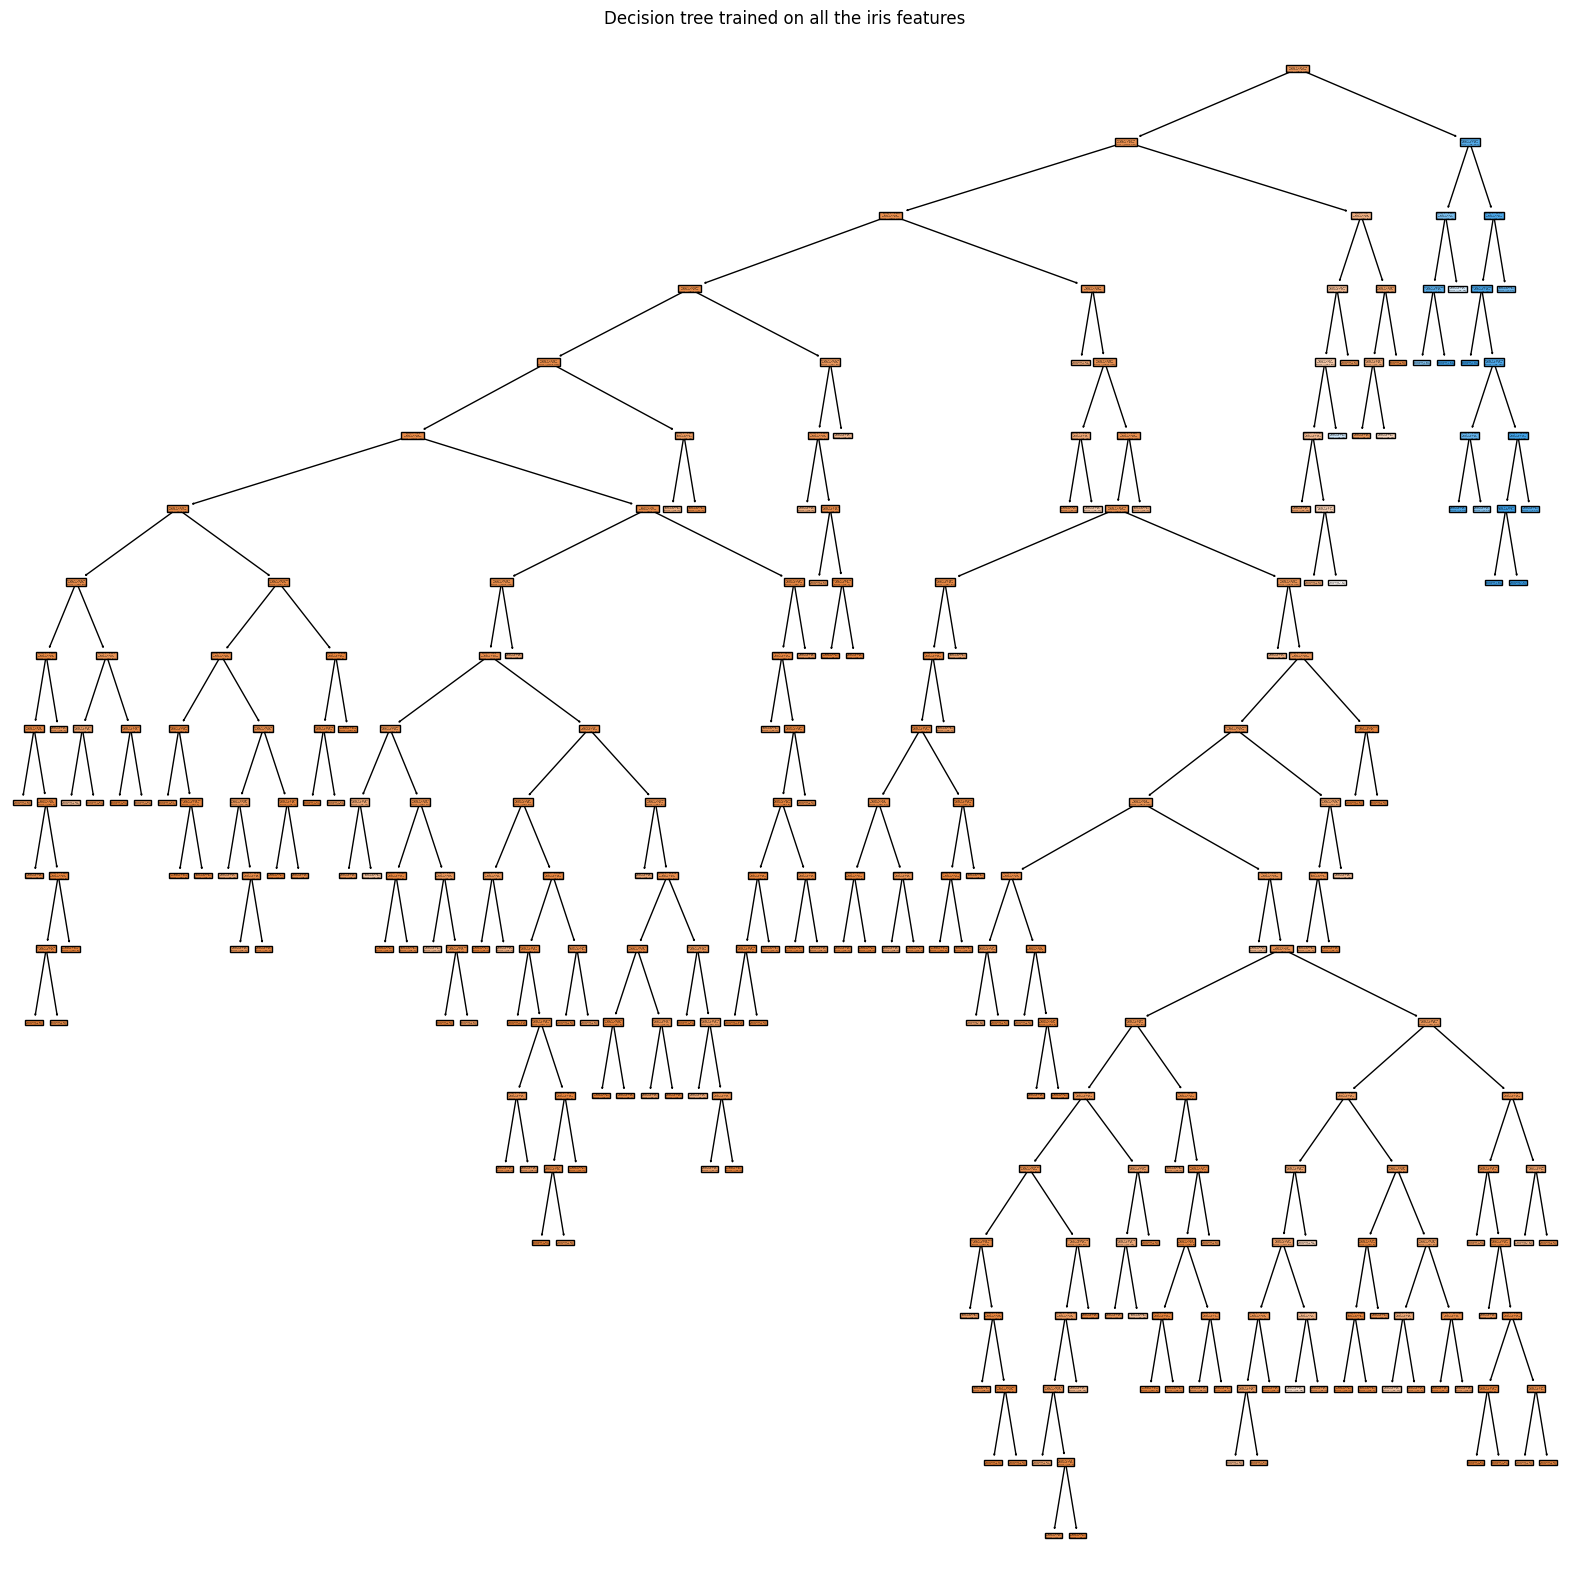

In [24]:
print(f'tree depth = {model.get_depth()}, number of leaf nodes = {model.get_n_leaves()}, params: {model.get_params()}')
print(f'feature_importance: {model.feature_importances_}')
# print name of feature with non-zero importance
important_fnames = []
for i, imp in enumerate(model.feature_importances_):
    if imp > 0:
        print(f'feature {i} {X_train.columns[i]} importance: {imp}')
        important_fnames.append(X_train.columns[i])


plt.figure(figsize=(20, 20))
plot_tree(model, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [25]:
def evaluate_model(model, xs, ys):
    y_predicted = model.predict(xs)

    accuracy = metrics.accuracy_score(ys, y_predicted)
    precision = metrics.precision_score(ys, y_predicted)
    recall = metrics.recall_score(ys,y_predicted)
    f1_score = metrics.f1_score(ys, y_predicted)


    print("--------------------------------------")
    # print('Accuracy is  {}'.format(accuracy))
    # print('Precision is {}'.format(precision))
    # print('Recall is    {}'.format(recall))
    # print('F1 score is  {}'.format(f1_score))
    # accuracy for each class
    print(metrics.classification_report(ys, y_predicted, digits=5))
    print("--------------------------------------")
    return accuracy, precision, recall
print("The model performance for training set")
evaluate_model(model, X_train, y_train)
print("The model performance for testing set")
evaluate_model(model, X_test, y_test)

The model performance for training set
--------------------------------------
              precision    recall  f1-score   support

           0    0.90283   0.98920   0.94404      5833
           1    0.85246   0.36954   0.51558       985

    accuracy                        0.89968      6818
   macro avg    0.87765   0.67937   0.72981      6818
weighted avg    0.89555   0.89968   0.88214      6818

--------------------------------------
The model performance for testing set
--------------------------------------
              precision    recall  f1-score   support

           0    0.90076   0.98730   0.94205      2519
           1    0.80247   0.32178   0.45936       404

    accuracy                        0.89531      2923
   macro avg    0.85161   0.65454   0.70070      2923
weighted avg    0.88718   0.89531   0.87533      2923

--------------------------------------


(0.8953130345535408, 0.8024691358024691, 0.3217821782178218)

In [26]:
y_predicted = model.predict(X_test)
# show percentage of different values
pd.Series(y_predicted).value_counts(normalize=True)

0    0.944577
1    0.055423
dtype: float64

## Train model with feature with non-zero importance

tree depth = 20, number of leaf nodes = 144, params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 30, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 77, 'splitter': 'best'}
feature_importance: [1.40483802e-02 4.46639496e-03 3.95583338e-03 4.71607150e-03
 1.54933937e-02 3.52304167e-02 2.00165379e-03 2.90055086e-02
 4.54680431e-02 1.01377261e-02 1.96249533e-02 6.51866697e-03
 7.09306934e-03 6.03984642e-03 1.69606001e-03 8.61204327e-03
 1.03423402e-03 1.19088410e-03 0.00000000e+00 0.00000000e+00
 1.05973588e-02 1.05757665e-02 1.02071725e-02 2.36495152e-03
 2.92116333e-03 8.31337590e-03 1.08454801e-03 1.49992286e-02
 5.15580367e-03 6.81782977e-03 1.69955718e-04 3.36528106e-03
 7.07094385e-01]
feature 0 pickup_day importance: 0.014048380175743282
feature 1 pickup_hour importance: 0.004466394962755323
feature 2 pickup_weekday importance

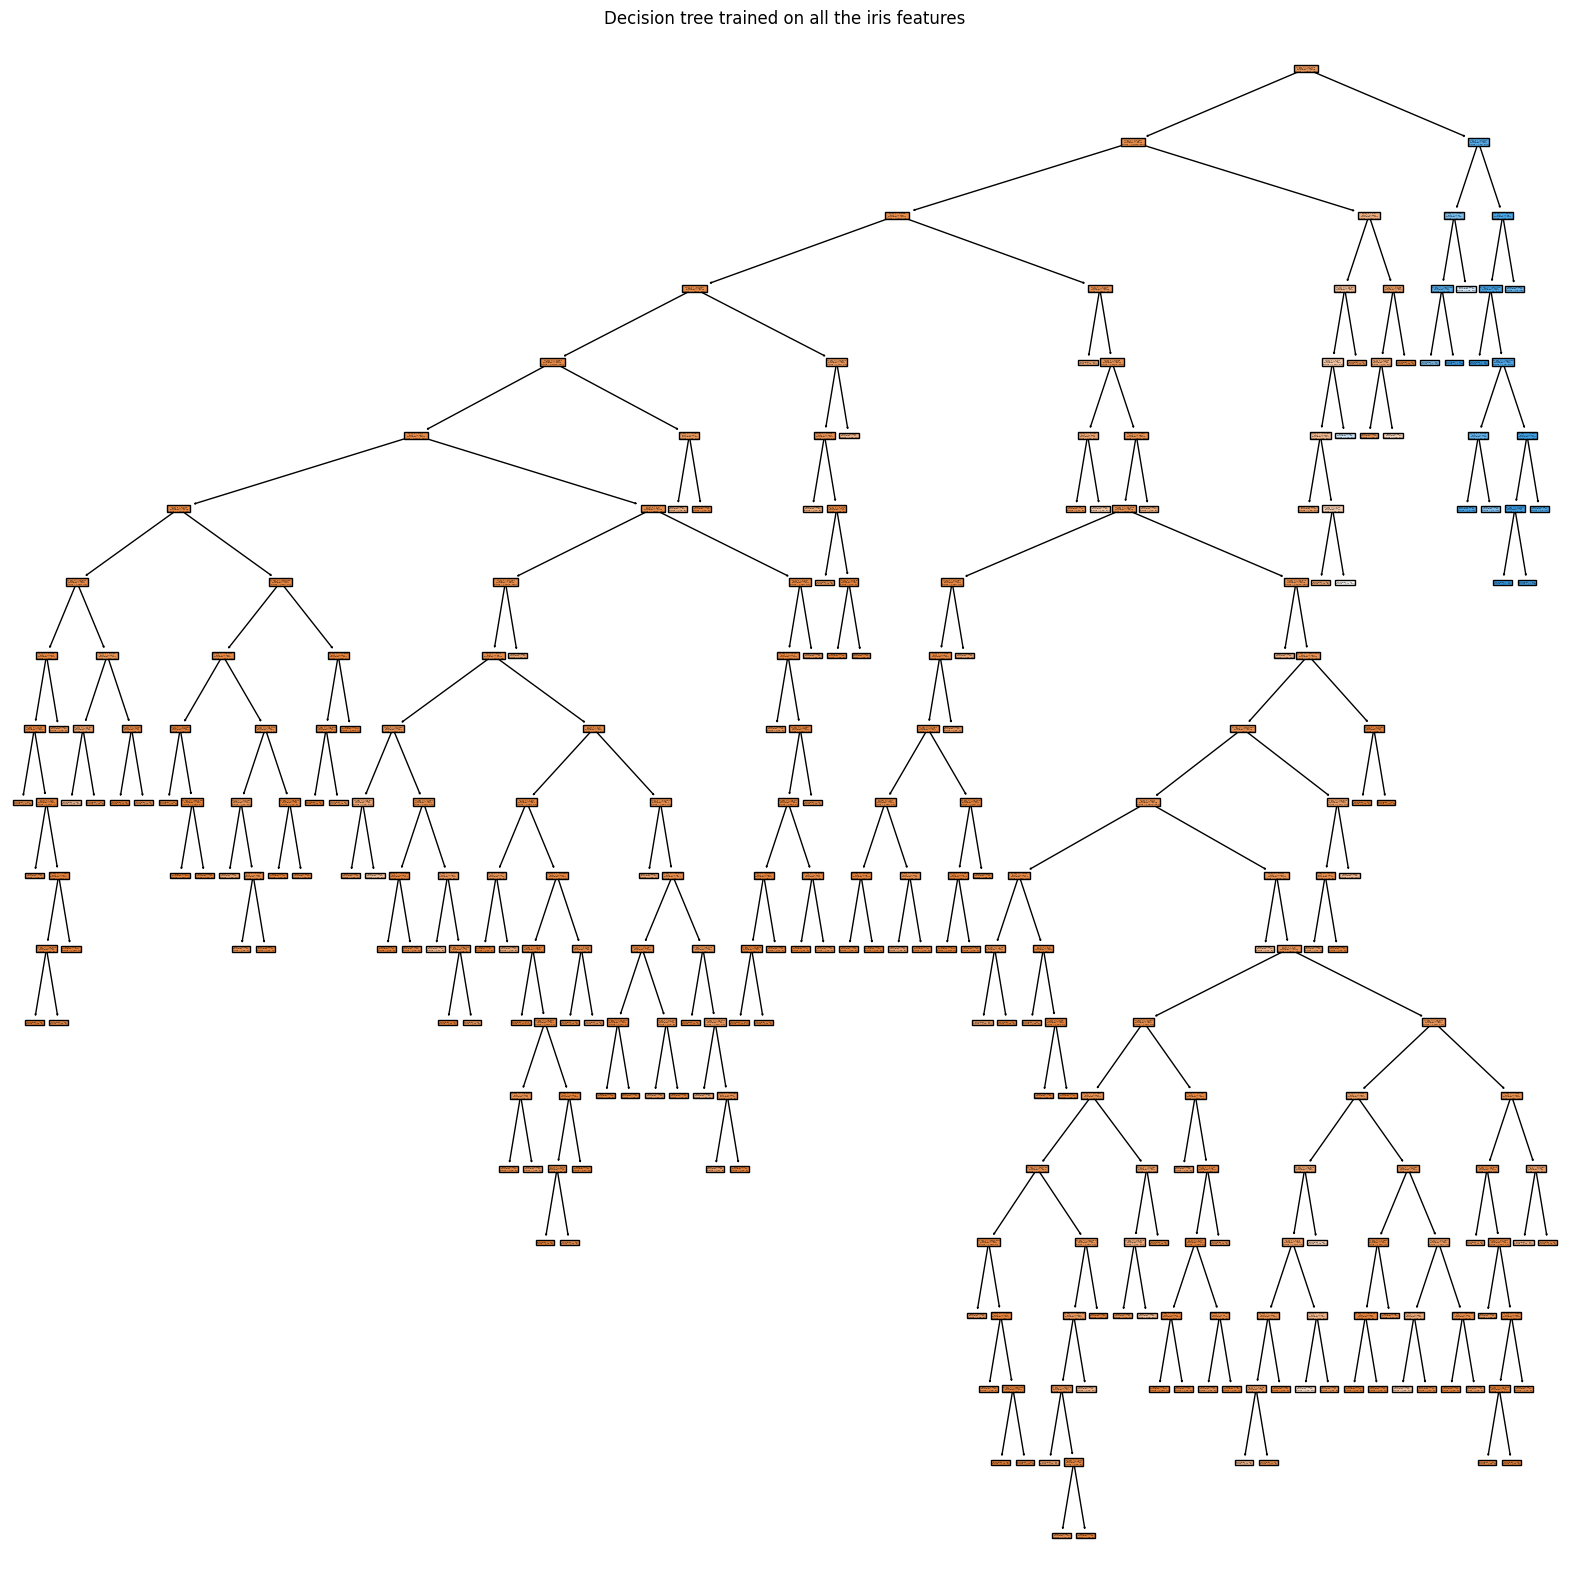

In [27]:
# important_fnames = [fname for fname in important_fnames if fname in agg_feature_names]
new_X_train = X_train[important_fnames]
new_X_test = X_test[important_fnames]

# new_model = DecisionTreeClassifier(max_leaf_nodes=20, random_state=77)
new_model = DecisionTreeClassifier(min_samples_leaf=30, random_state=77)
new_model.fit(new_X_train, y_train)

print(f'tree depth = {new_model.get_depth()}, number of leaf nodes = {new_model.get_n_leaves()}, params: {new_model.get_params()}')
print(f'feature_importance: {new_model.feature_importances_}')
# print name of feature with non-zero importance
for i, imp in enumerate(new_model.feature_importances_):
    if imp > 0:
        print(f'feature {i} {new_X_train.columns[i]} importance: {imp}')

plt.figure(figsize=(20, 20))
plot_tree(new_model, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [28]:
print("The model performance for training set")
evaluate_model(new_model, new_X_train, y_train)
print("The model performance for testing set")
evaluate_model(new_model, new_X_test, y_test)

# show percentage of different values
pd.Series(new_model.predict(new_X_test)).value_counts(normalize=True)

The model performance for training set
--------------------------------------
              precision    recall  f1-score   support

           0    0.90283   0.98920   0.94404      5833
           1    0.85246   0.36954   0.51558       985

    accuracy                        0.89968      6818
   macro avg    0.87765   0.67937   0.72981      6818
weighted avg    0.89555   0.89968   0.88214      6818

--------------------------------------
The model performance for testing set
--------------------------------------
              precision    recall  f1-score   support

           0    0.90076   0.98730   0.94205      2519
           1    0.80247   0.32178   0.45936       404

    accuracy                        0.89531      2923
   macro avg    0.85161   0.65454   0.70070      2923
weighted avg    0.88718   0.89531   0.87533      2923

--------------------------------------


0    0.944577
1    0.055423
dtype: float64

In [29]:
apx_df_raw_features = apx_df[selected_nonagg_features]
apx_df_agg_features = apx_df[selected_agg_features]
apx_df_features = apx_df_raw_features.join(apx_df_agg_features)
apx_X_train, apx_X_test, apx_y_train, apx_y_test = train_test_split(apx_df_features, df_target, test_size=0.3, shuffle=False)
apx_X_train = apx_X_train[important_fnames]
apx_X_test = apx_X_test[important_fnames]

In [30]:

print("The model performance for training set")
evaluate_model(new_model, apx_X_train, apx_y_train)
print("The model performance for testing set")
evaluate_model(new_model, apx_X_test, apx_y_test)

print("The model performance for training set to exact")
evaluate_model(new_model, apx_X_train, new_model.predict(new_X_train))
print("The model performance for testing set to exact")
evaluate_model(new_model, apx_X_test, new_model.predict(new_X_test))

# show percentage of different values
pd.Series(new_model.predict(apx_X_test)).value_counts(normalize=True)

The model performance for training set
--------------------------------------
              precision    recall  f1-score   support

           0    0.89858   0.97823   0.93672      5833
           1    0.72863   0.34619   0.46937       985

    accuracy                        0.88692      6818
   macro avg    0.81361   0.66221   0.70304      6818
weighted avg    0.87403   0.88692   0.86920      6818

--------------------------------------
The model performance for testing set
--------------------------------------
              precision    recall  f1-score   support

           0    0.89894   0.97817   0.93688      2519
           1    0.69780   0.31436   0.43345       404

    accuracy                        0.88642      2923
   macro avg    0.79837   0.64626   0.68516      2923
weighted avg    0.87114   0.88642   0.86730      2923

--------------------------------------
The model performance for training set to exact
--------------------------------------
              precision   

0    0.937735
1    0.062265
dtype: float64

In [31]:
# train set
node_train = new_model.apply(new_X_train)
apx_node_train = new_model.apply(apx_X_train)
print(metrics.classification_report(apx_node_train, node_train, digits=5))

# test set
node_test = new_model.apply(new_X_test)
apx_node_test = new_model.apply(apx_X_test)
print(metrics.classification_report(apx_node_test, node_test, digits=5))

              precision    recall  f1-score   support

          10    0.52830   0.11667   0.19113       240
          12    0.43478   0.37037   0.40000        54
          15    0.40000   0.20755   0.27329       106
          16    0.17949   0.20000   0.18919        35
          17    0.29508   0.17561   0.22018       205
          18    0.16667   0.11905   0.13889        42
          21    0.07895   0.03448   0.04800        87
          22    0.00000   0.00000   0.00000         3
          24    0.09524   0.08696   0.09091        46
          25    0.03333   0.05556   0.04167        18
          29    0.11765   0.11765   0.11765        34
          31    0.20792   0.20192   0.20488       104
          32    0.23333   0.20000   0.21538        35
          35    0.00000   0.00000   0.00000        14
          37    0.03333   0.11111   0.05128         9
          38    0.03125   0.14286   0.05128         7
          40    0.17647   0.21429   0.19355        42
          41    0.00000   0

/home/ckchang/anaconda3/envs/amd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ckchang/anaconda3/envs/amd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ckchang/anaconda3/envs/amd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ckchang/anaconda

In [32]:
tmp_X_train = new_X_train
tmp_X_test = new_X_test
for name in important_fnames:
    if name in agg_feature_names:
        default_value = X_train[name].mean()
        # default_value = 0
        print(f'feature {name} default value: {default_value}')
        tmp_X_train[name] = default_value
        tmp_X_test[name] = default_value
print("The model performance for training set")
evaluate_model(new_model, tmp_X_train, y_train)
print("The model performance for testing set")
evaluate_model(new_model, tmp_X_test, y_test)

print("The model performance for training set to exact")
evaluate_model(new_model, tmp_X_train, new_model.predict(new_X_train))
print("The model performance for testing set to exact")
evaluate_model(new_model, tmp_X_test, new_model.predict(new_X_test))


# train set
tmp_node_train = new_model.apply(tmp_X_train)
print(metrics.classification_report(tmp_node_train, node_train, digits=5))

# test set
tmp_node_test = new_model.apply(tmp_X_test)
print(metrics.classification_report(tmp_node_test, node_test, digits=5))

pd.Series(new_model.predict(tmp_X_train)).value_counts(normalize=True)

feature count_1h default value: 541.463919037841
feature avg_trip_distance_1h default value: 5.62453166577103
feature avg_fare_amount_1h default value: 11.439766869999485
feature avg_tip_amount_1h default value: 1.4930412389882617
feature avg_total_amount_1h default value: 14.303839651866218
feature sum_trip_distance_1h default value: 5571.10133928799
feature sum_fare_amount_1h default value: 5629.703732761147
feature sum_tip_amount_1h default value: 760.9358334130484
feature sum_total_amount_1h default value: 7093.8445650255635
feature std_trip_distance_1h default value: 112.78773884799261
feature std_fare_amount_1h default value: 6.537084930106215
feature std_tip_amount_1h default value: 1.7733014965247953
feature std_total_amount_1h default value: 7.979058770795622
feature var_trip_distance_1h default value: 15368131.146676017
feature var_fare_amount_1h default value: 50.14587598475476
feature var_tip_amount_1h default value: 4.5139091633878765
feature var_total_amount_1h default va

/tmp/ipykernel_608717/422376791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_X_train[name] = default_value
/tmp/ipykernel_608717/422376791.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_X_test[name] = default_value
/home/ckchang/anaconda3/envs/amd/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

0    1.0
dtype: float64